In [18]:
#Import the necessary libraries: pandas, matplotlib, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [105]:
#load the CSV file
taxis_df = sns.load_dataset("taxis")

In [106]:
#Visualize the first 5 rows
taxis_df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [107]:
#Visualize the last 5 rows
taxis_df.tail()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn
6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,green,credit card,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn


In [108]:
# Display information about the DataFrame
taxis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [109]:
# Generate descriptive statistics of the DataFrame
taxis_df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [110]:
# Show the null values
taxis_df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [111]:
# Replace null values in categorical columns with the mode
taxis_df['payment'].fillna(taxis_df['payment'].mode()[0], inplace=True)
taxis_df['pickup_zone'].fillna(taxis_df['pickup_zone'].mode()[0], inplace=True)
taxis_df['dropoff_zone'].fillna(taxis_df['dropoff_zone'].mode()[0], inplace=True)
taxis_df['pickup_borough'].fillna(taxis_df['pickup_borough'].mode()[0], inplace=True)
taxis_df['dropoff_borough'].fillna(taxis_df['dropoff_borough'].mode()[0], inplace=True)

# Verify that there are no null values
print(taxis_df.isnull().sum())

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64


In [112]:
# Check for duplicates
duplicados = taxis_df.duplicated().sum()

print(f"There are {duplicados} duplicate rows in the DataFrame.")

There are 0 duplicate rows in the DataFrame.


In [113]:
# Create a new column 'trip_duration' in minutes
taxis_df['trip_duration'] = (taxis_df['dropoff'] - taxis_df['pickup']).dt.total_seconds() / 60

In [114]:
taxis_df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trip_duration
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,6.250000
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,7.083333
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,7.400000
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,25.866667
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,9.533333


In [115]:
taxis_df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough', 'trip_duration'],
      dtype='object')

In [116]:
taxis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6433 non-null   object        
 10  pickup_zone      6433 non-null   object        
 11  dropoff_zone     6433 non-null   object        
 12  pickup_borough   6433 non-null   object        
 13  dropoff_borough  6433 non-null   object        
 14  trip_duration    6433 non-null   float64

In [117]:
# Select the relevant columns
columnas_relevantes = ['distance', 'fare', 'tolls', 'total', 'payment', 'pickup_zone', 'dropoff_zone', 'trip_duration', 'passengers', 'tip']
taxis_df_relevantes = taxis_df[columnas_relevantes]

# Verify the new DataFrame
taxis_df_relevantes.head()

,distance,fare,tolls,total,payment,pickup_zone,dropoff_zone,trip_duration,passengers,tip
0,1.60,7.0,0.0,12.95,credit card,Lenox Hill West,UN/Turtle Bay South,6.250000,1,2.15
1,0.79,5.0,0.0,9.30,cash,Upper West Side South,Upper West Side South,7.083333,1,0.00
2,1.37,7.5,0.0,14.16,credit card,Alphabet City,West Village,7.400000,1,2.36
3,7.70,27.0,0.0,36.95,credit card,Hudson Sq,Yorkville West,25.866667,1,6.15
4,2.16,9.0,0.0,13.40,credit card,Midtown East,Yorkville West,9.533333,3,1.10


In [118]:
# Visualize some graphs to better understand the dataset

In [119]:
# General style configuration
sns.set(style="whitegrid")

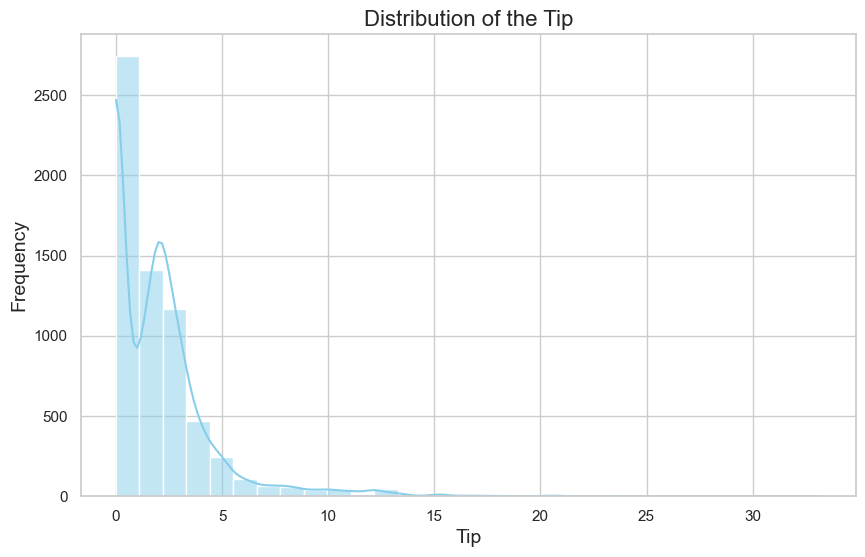

In [120]:
# 1. Distribution of the Tip (tip)
plt.figure(figsize=(10, 6))
sns.histplot(taxis_df_relevantes['tip'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of the Tip', fontsize=16)
plt.xlabel('Tip', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

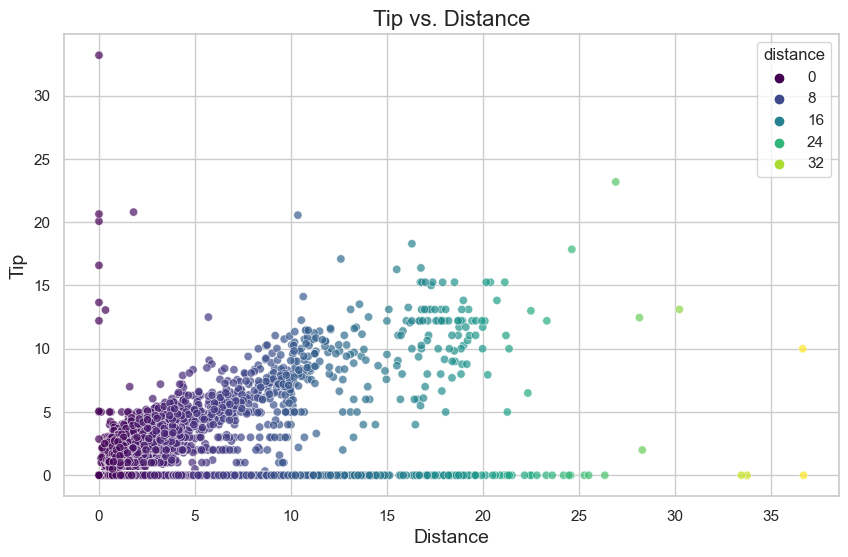

In [121]:
# 2. Tip vs. Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='tip', data=taxis_df_relevantes, hue='distance', palette='viridis', alpha=0.7)
plt.title('Tip vs. Distance', fontsize=16)
plt.xlabel('Distance', fontsize=14)
plt.ylabel('Tip', fontsize=14)
plt.show()

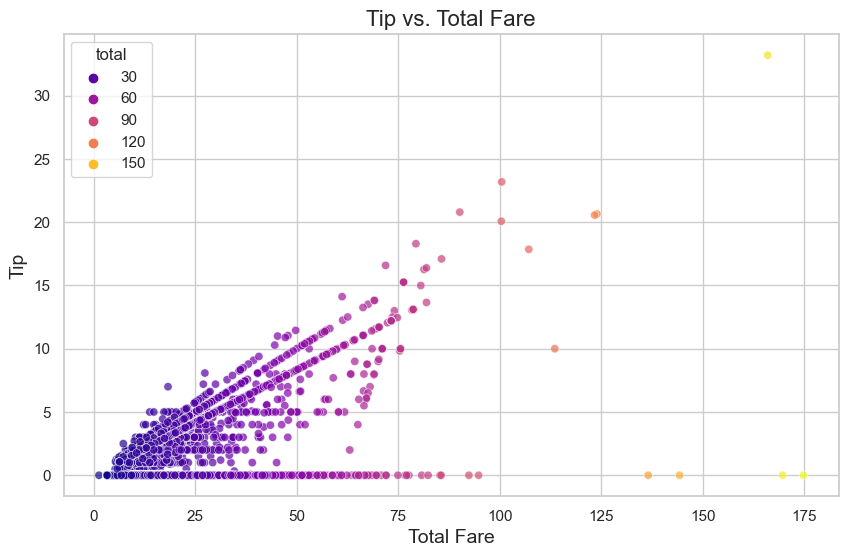

In [122]:
# 3. Tip vs. Total Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total', y='tip', data=taxis_df_relevantes, hue='total', palette='plasma', alpha=0.7)
plt.title('Tip vs. Total Fare', fontsize=16)
plt.xlabel('Total Fare', fontsize=14)
plt.ylabel('Tip', fontsize=14)
plt.show()

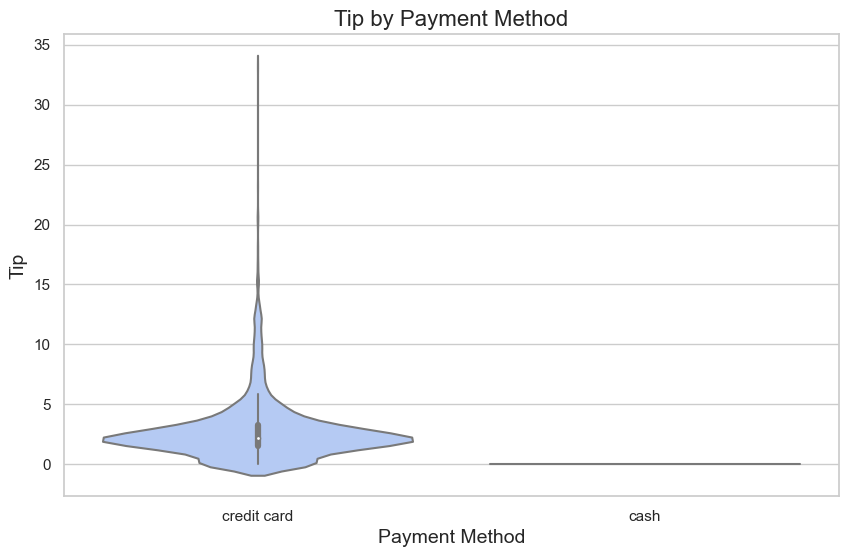

In [123]:
# 4. Tip by Payment Method
plt.figure(figsize=(10, 6))
sns.violinplot(x='payment', y='tip', data=taxis_df_relevantes, palette='coolwarm')
plt.title('Tip by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Tip', fontsize=14)
plt.show()

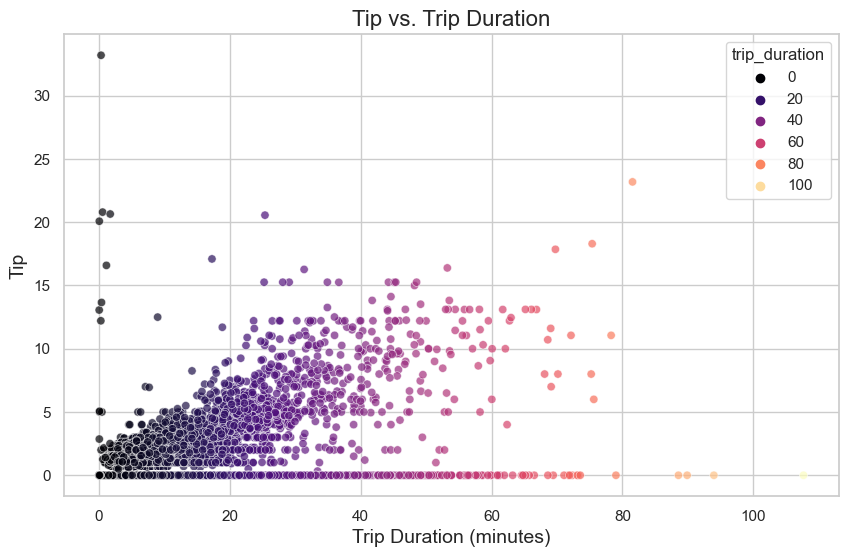

In [125]:
# 5. Tip vs. Trip Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='tip', data=taxis_df_relevantes, hue='trip_duration', palette='magma', alpha=0.7)
plt.title('Tip vs. Trip Duration', fontsize=16)
plt.xlabel('Trip Duration (minutes)', fontsize=14)
plt.ylabel('Tip', fontsize=14)
plt.show()

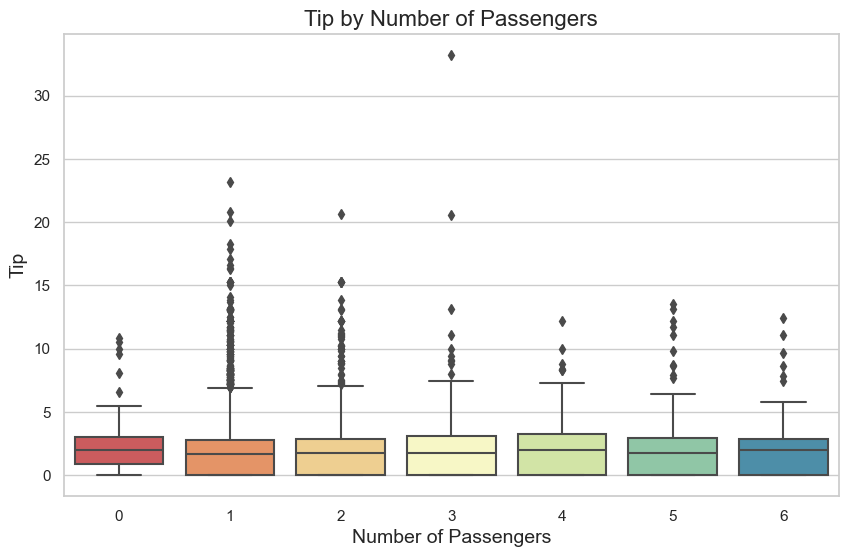

In [126]:
# 6. Tip by Number of Passengers
plt.figure(figsize=(10, 6))
sns.boxplot(x='passengers', y='tip', data=taxis_df_relevantes, palette='Spectral')
plt.title('Tip by Number of Passengers', fontsize=16)
plt.xlabel('Number of Passengers', fontsize=14)
plt.ylabel('Tip', fontsize=14)
plt.show()

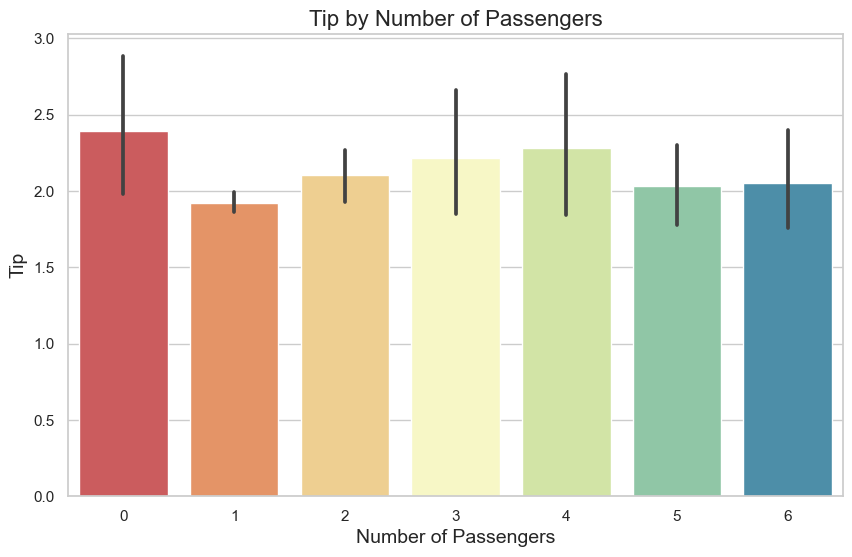

In [127]:
# 7. Tip by Number of Passengers
plt.figure(figsize=(10, 6))
sns.barplot(x='passengers', y='tip', data=taxis_df_relevantes, palette='Spectral')
plt.title('Tip by Number of Passengers', fontsize=16)
plt.xlabel('Number of Passengers', fontsize=14)
plt.ylabel('Tip', fontsize=14)
plt.show()

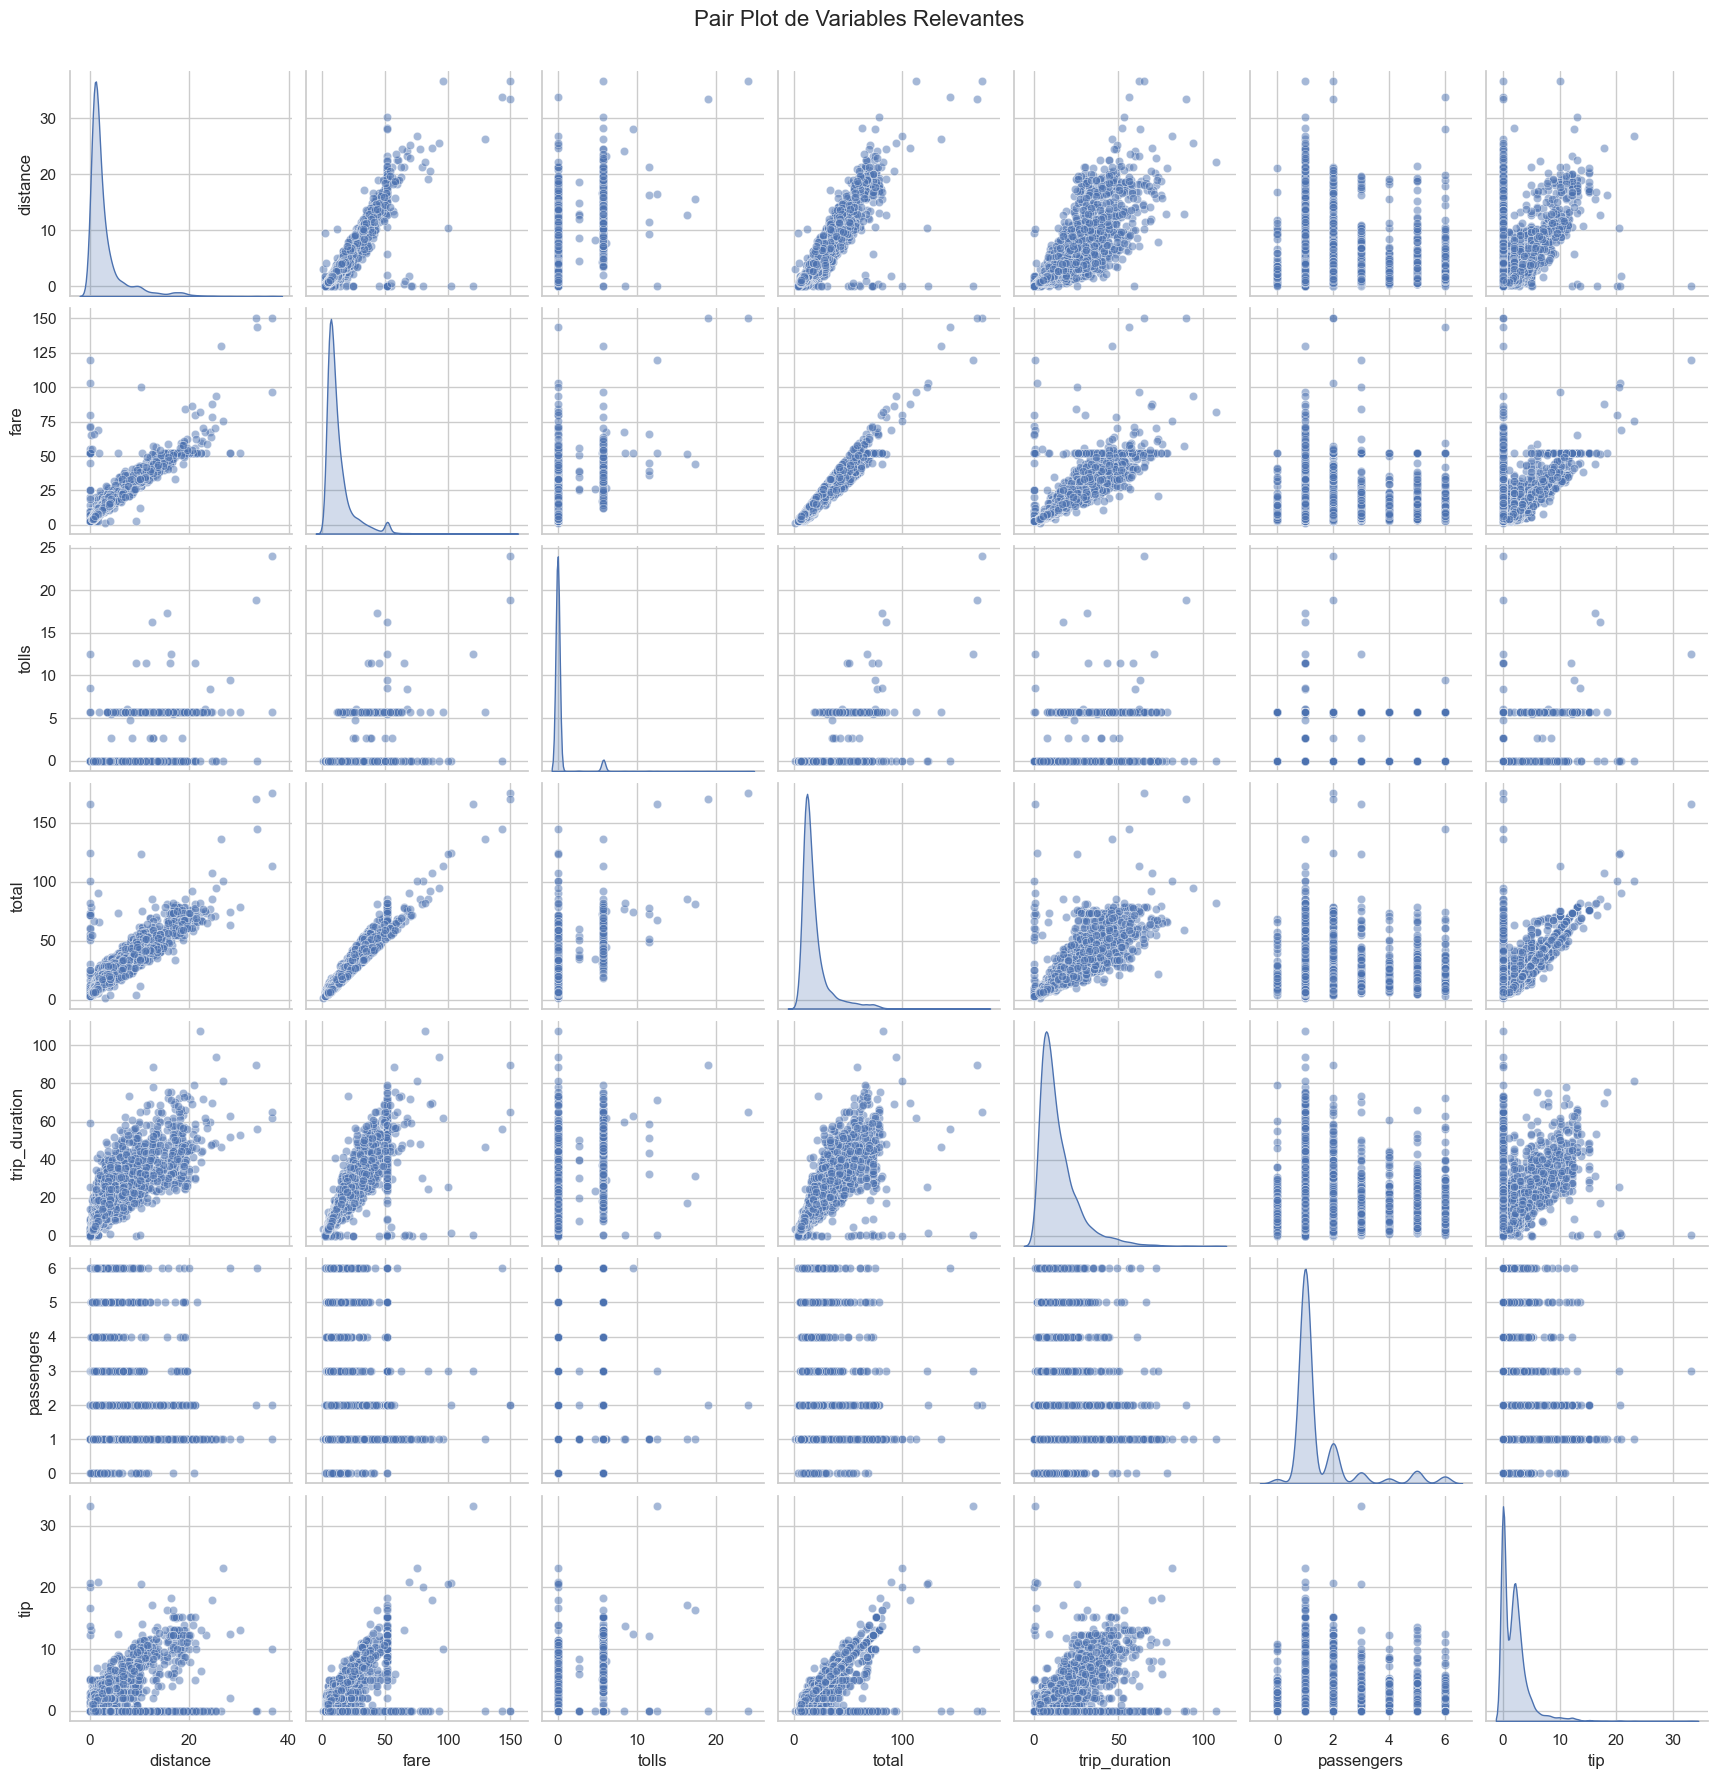

In [53]:
# Crear el pair plot
sns.pairplot(taxis_df_relevantes, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot de Variables Relevantes', y=1.02, fontsize=16)
plt.show()

In [128]:
# Create a linear RandomForest model to predict the tip

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [146]:
# Select features and target variable
X = taxis_df_relevantes[['distance', 'fare', 'tolls', 'total', 'trip_duration', 'passengers']]
y = taxis_df_relevantes['tip']

In [147]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [149]:
# Create and train the model
modelo_bosque = RandomForestRegressor(random_state=42, n_estimators=100)
modelo_bosque.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [150]:
# Make predictions
y_pred_bosque = modelo_bosque.predict(X_test_scaled)

In [151]:
# Evaluate the model
mae_bosque = mean_absolute_error(y_test, y_pred_bosque)
mse_bosque = mean_squared_error(y_test, y_pred_bosque)
rmse_bosque = mean_squared_error(y_test, y_pred_bosque, squared=False)
r2_bosque = r2_score(y_test, y_pred_bosque)

print(f"RandomForest - Error Absoluto Medio (MAE): {mae_bosque}")
print(f"RandomForest - Error Cuadrático Medio (MSE): {mse_bosque}")
print(f"RandomForest - Raíz del Error Cuadrático Medio (RMSE): {rmse_bosque}")
print(f"RandomForest - Coeficiente de Determinación (R²): {r2_bosque}")

RandomForest - Error Absoluto Medio (MAE): 0.32789656454656485
RandomForest - Error Cuadrático Medio (MSE): 0.8732180489902561
RandomForest - Raíz del Error Cuadrático Medio (RMSE): 0.9344613683776639
RandomForest - Coeficiente de Determinación (R²): 0.8657189643191301


In [152]:
# Explanation of results

In [153]:
# Explanation of metrics:
# 1. Mean Absolute Error (MAE)
# MAE: 0.3279
# The Mean Absolute Error (MAE) measures the average of the absolute errors between the model's predictions and the actual values.
# In this case, an MAE of 0.3279 means that, on average, the model's predictions are 0.3279 units away from the actual tip.
# A lower MAE indicates a more accurate model.

# 2. Mean Squared Error (MSE)
# MSE: 0.8732
# The Mean Squared Error (MSE) is the mean of the squared errors between the model's predictions and the actual values.
# The MSE penalizes larger errors more due to the squaring, which can be useful for identifying models with large prediction errors.
# An MSE of 0.8732 indicates the magnitude of the mean squared error.

# 3. Root Mean Squared Error (RMSE)
# RMSE: 0.9345
# The Root Mean Squared Error (RMSE) is the square root of the MSE. It provides a measure of error in the same units as the target variable (in this case, the tip).
# An RMSE of 0.9345 indicates that, on average, the model's predictions are 0.9345 units away from the actual tip.
# Like the MSE, a lower RMSE indicates better model performance.

# 4. Coefficient of Determination (R²)
# R²: 0.8657
# The Coefficient of Determination (R²) measures the proportion of the variability in the target variable that can be explained by the model's features.
# An R² of 0.8657 means that the model explains approximately 86.57% of the variability in the tip.
# An R² closer to 1 indicates a better fit of the model to the data.

# Summary:
# - MAE: Indicates the average accuracy of the predictions.
# - MSE and RMSE: Provide a measure of the magnitude of the error, penalizing larger errors more.
# - R²: Indicates how well the model explains the variability in the tip.


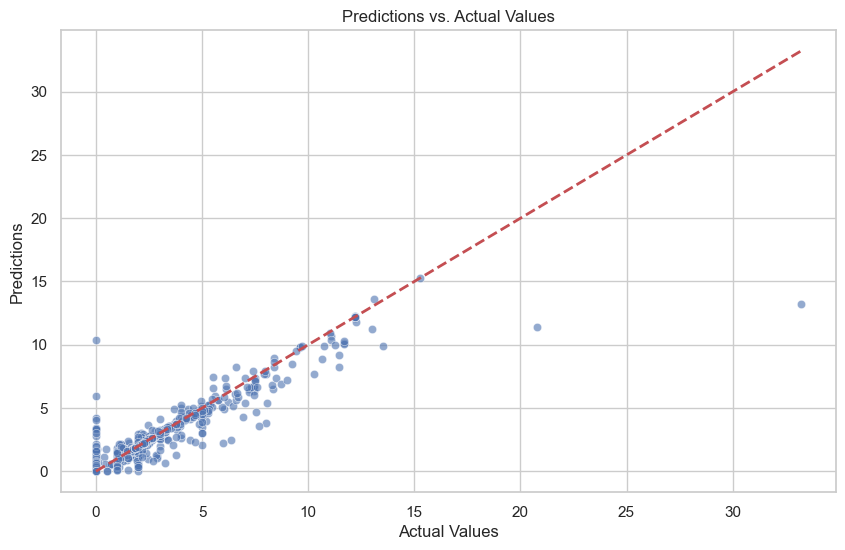

In [154]:
# Scatter plot of predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_bosque, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

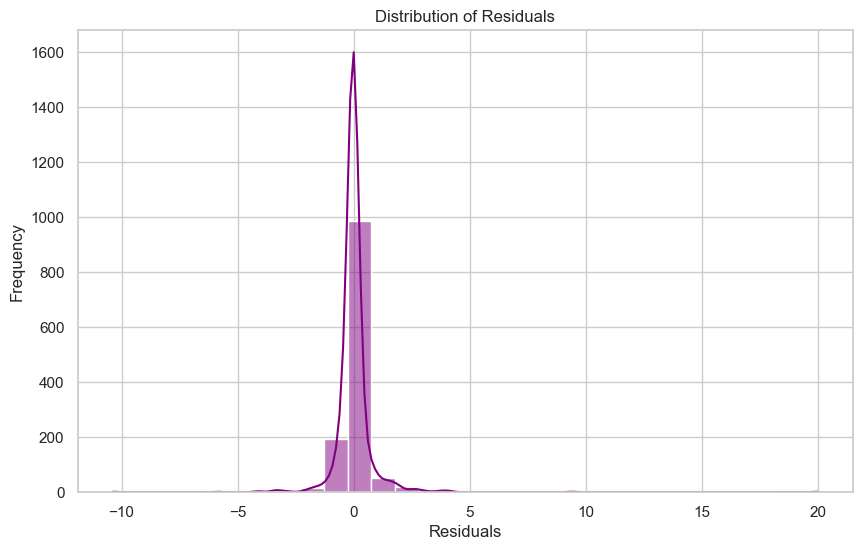

In [155]:
# Residuals plot
residuos = y_test - y_pred_bosque
plt.figure(figsize=(10, 6))
sns.histplot(residuos, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

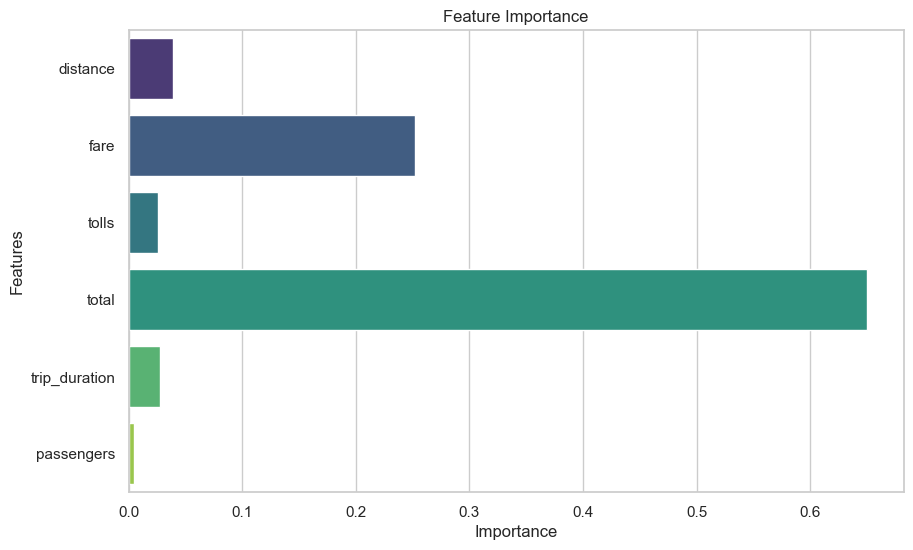

In [156]:
# Feature Importance
importancias = modelo_bosque.feature_importances_
caracteristicas = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importancias, y=caracteristicas, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [157]:
# Explanation of the graphs

In [158]:
#Scatter Plot of Predictions vs. Actual Values:
#This chart shows how the model’s predictions compare with the actual tip values.
#The red line represents the ideal case where the predictions are exactly equal to the actual values.

In [159]:
#Residuals Plot:
#This chart shows the distribution of residuals (prediction errors).
#A good model should have residuals approximately normally distributed around zero.

In [160]:
#Feature Importance:
#This chart shows the relative importance of each feature in the Random Forest model.
#Features with higher importance have a greater impact on the model’s predictions.

In [161]:
#Test the Model

In [163]:
def predict_tip(distance, fare, tolls, total, trip_duration, passengers):
    # Create a DataFrame with the input data
    data = pd.DataFrame({
        'distance': [distance],
        'fare': [fare],
        'tolls': [tolls],
        'total': [total],
        'trip_duration': [trip_duration],
        'passengers': [passengers]
    })
    
    # Normalize the data
    data_scaled = scaler.transform(data)
    
    # Make the prediction
    predicted_tip = modelo_bosque.predict(data_scaled)
    
    return predicted_tip[0]

# Example usage of the function
distance = 5.0
fare = 15.0
tolls = 0.0
total = 15.0
trip_duration = 10.0
passengers = 1

tip = predict_tip(distance, fare, tolls, total, trip_duration, passengers)
print(f"The tip is: {tip}")

The tip is: 0.34950000000000003
